# Respostas Desafios Aula 1

Este notebook contém os as resposntas dos desafios da Aula 1 do treinamenot da alura. QuarentenaDados

In [0]:
import pandas as pd

importando filmes

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


importando alaliações

In [3]:
#avaliacoes é um dataframe
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Renomenado colunas

In [4]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Desafios

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [0]:
# Selecionando a coluna 'filmeId' do dataframe de avaliações

serie_filmes_avaliados = avaliacoes["filmeId"]

In [6]:
# Selecionando filmes sem avaliação

df_filmes_sem_avaliacao1 = filmes.query("filmeId not in @serie_filmes_avaliados")

df_filmes_sem_avaliacao1.shape

(18, 3)

In [7]:
df_filmes_sem_avaliacao1

,filmeId,titulo,generos
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


Solução baseada em 
https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.


Código do notebook da aula

In [8]:
#Agrupando por filme
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

#Realizando join com dataframe 'filmes'
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()


,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Renomeando colunas

In [9]:
filmes_com_media.columns =  ["filmeId", "titulo", "generos", "nota_média"]

filmes_com_media.head(5)

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [10]:
#Obtendo total de avaliações por filme
serie_total_avaliacoes_filmes = avaliacoes.groupby("filmeId")["filmeId"].count()
serie_total_avaliacoes_filmes.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: filmeId, dtype: int64

In [0]:
#Juntando bases de dados
#rsuffix: Parâmetro adiciona sufixo a coluna do dataset 'direito' quanto possui um coluna com o mesmo de uma coluna do dataset esquerdo
df_filmes_medias_avaliacoes = filmes_com_media.join(serie_total_avaliacoes_filmes, on="filmeId", rsuffix="_av")

In [12]:
#Exibindo as 15 primeiras linhas 
df_filmes_medias_avaliacoes.head(15)

,filmeId,titulo,generos,nota_média,filmeId_av
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0
8,9,Sudden Death (1995),Action,3.125000,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0


In [13]:
#Renomenando colunas
df_filmes_medias_avaliacoes.columns = ['filmeId', 'titulo', 'generos', 'nota_média', 'avaliacoes']

#Exibindo 15 primiras linhas
df_filmes_medias_avaliacoes.head(15)

,filmeId,titulo,generos,nota_média,avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0
8,9,Sudden Death (1995),Action,3.125000,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [14]:
filmes_com_media.head(15)

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


In [0]:
#Backup Talvez seja necessário averiguar a média com maior precisão
filmes_com_media_bkp  = filmes_com_media

In [0]:
#Arredondando a média de nota
filmes_com_media["nota_média"] = round(filmes_com_media["nota_média"], 2)

In [17]:
filmes_com_media.head(15)

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
5,6,Heat (1995),Action|Crime|Thriller,3.95
6,7,Sabrina (1995),Comedy|Romance,3.19
7,8,Tom and Huck (1995),Adventure|Children,2.88
8,9,Sudden Death (1995),Action,3.12
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.50


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
#Obtendo série dos generos
serie_genero_filmes = filmes["generos"]

In [0]:
#Convertendo série em lista
lst1 = serie_genero_filmes.to_list()

In [0]:
#Juntando generos dos filmes
str_generos = "|".join(lst1)

In [0]:
#Gerando dataframe dos gêneros
df_genero = pd.DataFrame(data=str_generos.split("|"), columns=["genero"])

In [22]:
#Exibindo 15 primeiros
df_genero.head(15)

,genero
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Adventure
6,Children
7,Fantasy
8,Comedy
9,Romance


In [23]:
#Adiconado coluna 'contador com valor igual a 1'
df_genero["aparicoes"] = 1

df_genero.head(15)

,genero,aparicoes
0,Adventure,1
1,Animation,1
2,Children,1
3,Comedy,1
4,Fantasy,1
5,Adventure,1
6,Children,1
7,Fantasy,1
8,Comedy,1
9,Romance,1


In [0]:
#Série com o agrupamento por gênero
serie_genero_total = df_genero.groupby("genero")["aparicoes"].count()

In [25]:
serie_genero_total.shape

(20,)

In [26]:
serie_genero_total

genero
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
Name: aparicoes, dtype: int64

Verificando '(no genres listed)'

In [0]:
#Gerando da dataframe da série 'serie_genero_total'
df_generos = pd.DataFrame(data= serie_genero_total )

In [0]:
#fonte: https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
df_filmes_sem_genero = filmes[filmes["generos"] == "(no genres listed)"]

In [29]:
df_filmes_sem_genero.shape

(34, 3)

In [30]:
df_filmes_sem_genero.head(10)

,filmeId,titulo,generos
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [31]:
df_filmes_sem_genero = filmes[filmes["generos"] == ""]

df_filmes_sem_genero.shape

(0, 3)

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

Considerando o dataframe 'df_generos'

In [32]:
df_generos.head(5)

,aparicoes
genero,
(no genres listed),34
Action,1828
Adventure,1263
Animation,611
Children,664


In [0]:
#Convertendo índice em coluna
#Fonte: https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/

df_generos.reset_index(inplace=True)

In [34]:
df_generos

,genero,aparicoes
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


In [35]:
df_generos_f1 = df_generos[df_generos["genero"] != "(no genres listed)"]

df_generos_f1

,genero,aparicoes
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779
10,Film-Noir,87


## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

Considerando 'df_generos_f1'

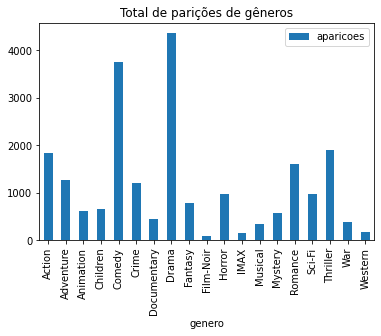

In [36]:
df_generos_f1.plot(kind="bar", title="Total de parições de gêneros", x="genero" )